<a href="https://colab.research.google.com/github/Alexa-alekhya/Understanding-Machine-Learning-Algorithms/blob/Final-project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
df = pd.read_csv('heart_v2.csv')

In [ ]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [ ]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
print(X)

     age  sex   BP  cholestrol
0     70    1  130         322
1     67    0  115         564
2     57    1  124         261
3     64    1  128         263
4     74    0  120         269
..   ...  ...  ...         ...
265   52    1  172         199
266   44    1  120         263
267   56    0  140         294
268   57    1  140         192
269   67    1  160         286

[270 rows x 4 columns]


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape
print(X_train)

     age  sex   BP  cholestrol
115   49    0  134         271
33    59    1  170         326
184   53    1  130         246
142   50    1  140         233
197   54    0  110         214
..   ...  ...  ...         ...
20    67    1  120         229
188   62    0  140         394
71    57    0  120         354
106   51    1  100         222
102   49    0  130         269

[216 rows x 4 columns]


In [ ]:
#Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
print(X_train)

     age  sex   BP  cholestrol
115   49    0  134         271
33    59    1  170         326
184   53    1  130         246
142   50    1  140         233
197   54    0  110         214
..   ...  ...  ...         ...
20    67    1  120         229
188   62    0  140         394
71    57    0  120         354
106   51    1  100         222
102   49    0  130         269

[216 rows x 4 columns]


In [ ]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


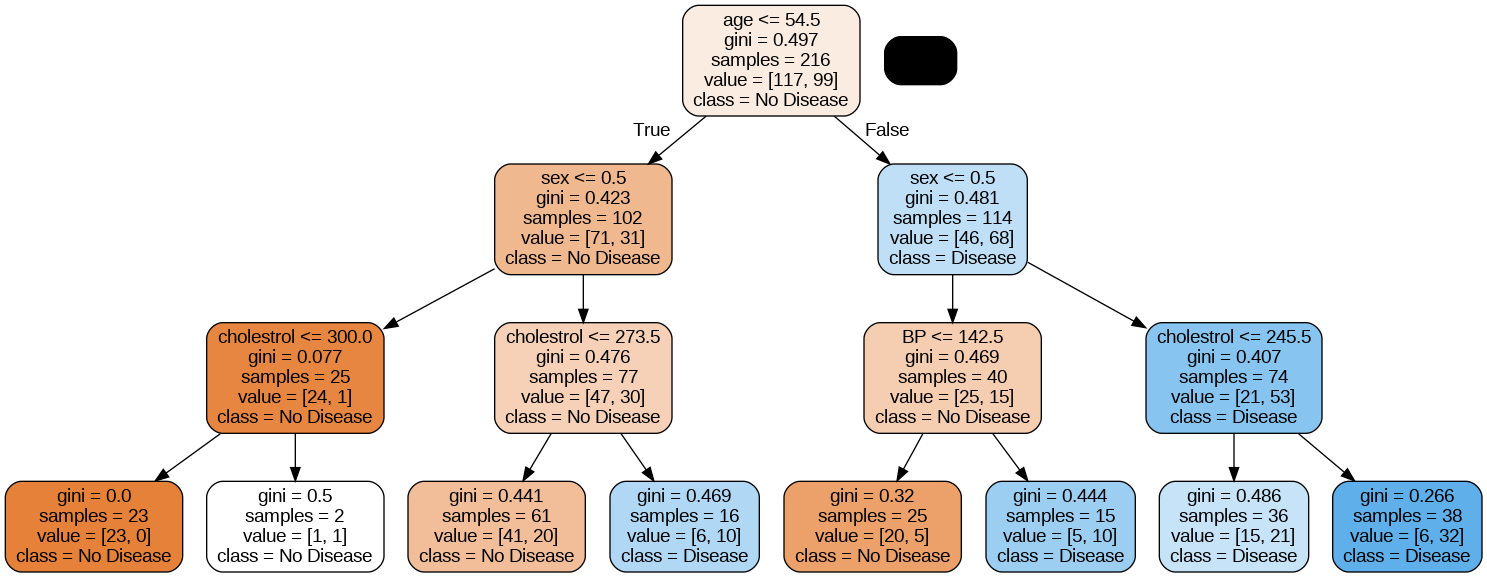

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
#Evaluating model performance

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
print(X_train)

     age  sex   BP  cholestrol
115   49    0  134         271
33    59    1  170         326
184   53    1  130         246
142   50    1  140         233
197   54    0  110         214
..   ...  ...  ...         ...
20    67    1  120         229
188   62    0  140         394
71    57    0  120         354
106   51    1  100         222
102   49    0  130         269

[216 rows x 4 columns]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7314814814814815


array([[85, 32],
       [26, 73]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6296296296296297


array([[22, 11],
       [ 9, 12]])

In [ ]:
Xnew=[[21,0,93,250]]
Ynew=dt.predict(Xnew)
print(Xnew[0],Ynew[0])

[21, 0, 93, 250] 0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
